### Import the necessary libraries

In [36]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Load data

In [22]:
# Load the dataset
data = pd.read_csv('dataset.csv')
data.head()

,Sold_On,Size,Ingredients_Cost,Design_Complexity,Time_Taken,Price,Amount,Gender
0,Monday,large,28,complex,6,49,10,female
1,Saturday,medium,65,simple,2,93,9,female
2,Wednesday,large,96,simple,5,128,8,male
3,Tuesday,medium,155,simple,3,198,6,female
4,Saturday,large,20,simple,2,32,5,male


### Check for missing data

In [23]:
data.isna().sum()

Sold_On              0
Size                 0
Ingredients_Cost     0
Design_Complexity    0
Time_Taken           0
Price                0
Amount               0
Gender               0
dtype: int64

### Check for duplicates

In [24]:
# Check for duplicates
duplicates = data.duplicated()
print(f"Number of duplicates: {duplicates.sum()}")

Number of duplicates: 1


### Remove duplicates

In [25]:
# Remove duplicates
data_cleaned = data.drop_duplicates()

# Reset the index after removing duplicates
data_cleaned.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
data_cleaned

,Sold_On,Size,Ingredients_Cost,Design_Complexity,Time_Taken,Price,Amount,Gender
0,Monday,large,28,complex,6,49,10,female
1,Saturday,medium,65,simple,2,93,9,female
2,Wednesday,large,96,simple,5,128,8,male
3,Tuesday,medium,155,simple,3,198,6,female
4,Saturday,large,20,simple,2,32,5,male
...,...,...,...,...,...,...,...,...
3994,Thursday,medium,200,simple,4,283,10,female
3995,Saturday,medium,152,complex,7,202,1,female
3996,Friday,small,153,complex,10,218,6,male
3997,Tuesday,small,207,simple,4,280,5,male


### Encoding categorical variables

In [40]:
def encode_labels(dataframe, columns):
    label_encoder = LabelEncoder()
    for column in columns:
        dataframe[column] = label_encoder.fit_transform(dataframe[column])
    return dataframe
    

In [41]:
# List of columns to encode
columns_to_encode = ['Sold_On', 'Size', 'Design_Complexity', 'Gender']

# Apply the function
data_cleaned = encode_labels(data_cleaned, columns_to_encode)

C:\Users\asman\AppData\Local\Temp\ipykernel_19596\377946139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = label_encoder.fit_transform(dataframe[column])
C:\Users\asman\AppData\Local\Temp\ipykernel_19596\377946139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = label_encoder.fit_transform(dataframe[column])
C:\Users\asman\AppData\Local\Temp\ipykernel_19596\377946139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [43]:
data_cleaned

,Sold_On,Size,Ingredients_Cost,Design_Complexity,Time_Taken,Price,Amount,Gender
0,1,0,28,0,6,49,10,0
1,2,1,65,1,2,93,9,0
2,6,0,96,1,5,128,8,1
3,5,1,155,1,3,198,6,0
4,2,0,20,1,2,32,5,1
...,...,...,...,...,...,...,...,...
3994,4,1,200,1,4,283,10,0
3995,2,1,152,0,7,202,1,0
3996,0,2,153,0,10,218,6,1
3997,5,2,207,1,4,280,5,1


### Check for outliers

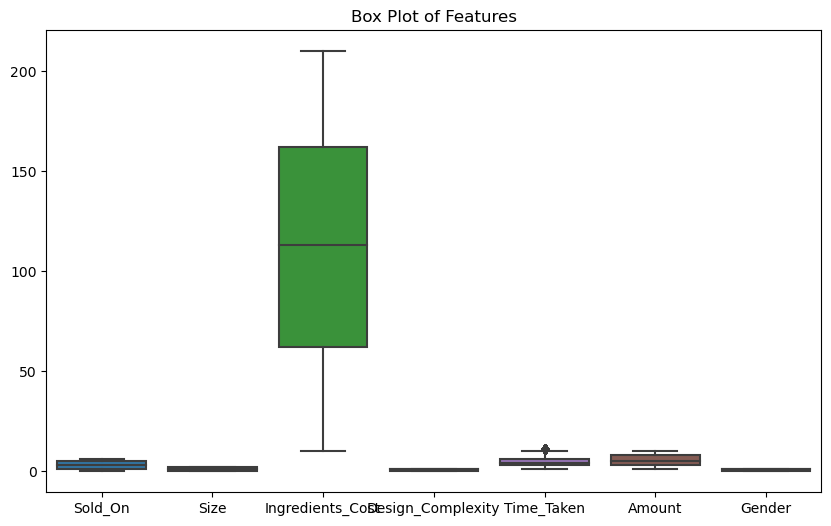

In [28]:
# Box plots to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned.drop('Price', axis=1))
plt.title('Box Plot of Features')
plt.show()

In [60]:
# Features and target variable
X = data_cleaned.drop(['Price','Gender'], axis=1)
y = data_cleaned['Price']

### Split data into 70% for training and 30% for testing

In [62]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Initialize the model

In [61]:
# Initialize the model
model = RandomForestRegressor(random_state=42)

### Train the model

In [63]:
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Get feature importance

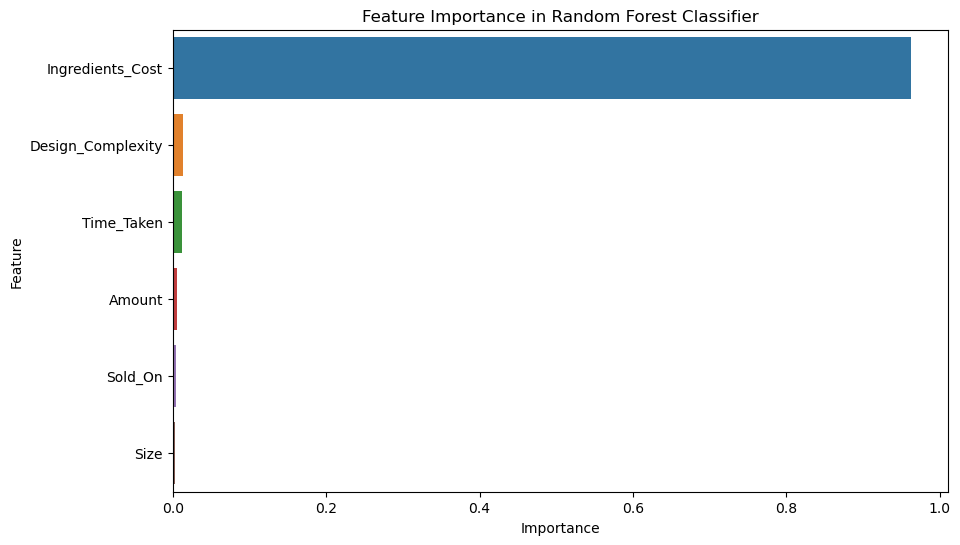

In [64]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

In [65]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 9.384351944444445
Mean Squared Error (MSE): 151.5736452803241
R-squared (R²): 0.9734548448427254
